# Investigating M3
- This notebook aims to use the gaia subset obtained initially to verify that globuluar clusters can be located and the relative population size and span of characterisitcs

In [ ]:
from Analysis import reddening_correction

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import votable
from astropy.table import Table
from astropy.io import fits

# M3

### Loading the data

In [393]:
# Loading the data
M3_path = 'data/M3.fits'
with fits.open(M3_path) as M3_hdul:
    M3_data = Table(M3_hdul[1].data).to_pandas()
    display(M3_data.describe())

source_id            l            b           ra          dec  \
count  2.624000e+03  2624.000000  2624.000000  2624.000000  2624.000000   
mean   1.454747e+18    42.225566    78.699383   205.554767    28.379293   
std    5.518618e+14     1.031256     0.210989     0.238945     0.202879   
min    1.448733e+18    37.164087    77.735745   204.478777    27.388099   
25%    1.454782e+18    41.908445    78.638836   205.477440    28.316762   
50%    1.454797e+18    42.231482    78.702068   205.553328    28.380028   
75%    1.454878e+18    42.533749    78.769194   205.624759    28.438705   
max    1.455301e+18    47.257857    79.658680   206.657502    29.374176   

          ra_error    dec_error  phot_g_mean_mag  phot_bp_mean_mag  \
count  2624.000000  2624.000000      2624.000000       2624.000000   
mean      0.360917     0.284920        19.302872         19.509132   
std       0.286510     0.233104         1.327277          1.358621   
min       0.010601     0.008788        12.044281         12.913686   
25%       0.159774     0.124876        18.818489         18.916344   
50%       0.283028     0.220001        19.590519         19.751345   
75%       0.480145     0.380151        20.239874         20.503936   
max       2.420527     2.029098        20.930042         22.133139   

       phot_rp_mean_mag  ...         pmra        pmdec  radial_velocity  \
count       2624.000000  ...  2624.000000  2624.000000        21.000000   
mean          18.755459  ...    -0.715811    -3.129140      -150.132370   
std            1.384604  ...     3.063415     2.752664        14.580626   
min           11.116984  ...   -49.158409   -47.532196      -206.659012   
25%           18.247458  ...    -0.680255    -3.010888      -151.383194   
50%           19.038967  ...    -0.197994    -2.690839      -148.411179   
75%           19.722173  ...     0.177603    -2.451084      -142.070435   
max           20.985870  ...    16.222058    12.898849      -131.134735   

       mh_gspphot  teff_gspphot  logg_gspphot        bp_rp  r_med_photogeo  \
count  657.000000    657.000000    657.000000  2624.000000     2624.000000   
mean    -1.760577   6088.343262      4.398466     0.753673     7673.193359   
std      1.026824   1492.579224      0.538999     0.252796     3585.811523   
min     -4.129400   4215.557617      0.839000    -0.472437      297.637146   
25%     -2.241600   5554.474609      4.384200     0.632002     4799.244995   
50%     -1.516000   6020.334961      4.629400     0.703444     8037.397705   
75%     -1.041100   6239.863281      4.682800     0.832712    10191.958252   
max      0.680000  32494.890625      4.827200     3.024699    24939.515625   

       r_hi_photogeo  r_lo_photogeo  
count    2624.000000    2624.000000  
mean     9984.670898    5944.556641  
std      4557.710449    2997.124756  
min       319.890930     233.047211  
25%      6318.167480    3563.094666  
50%     10382.031250    6235.870117  
75%     13092.490967    8128.462280  
max     29469.685547   20591.712891  

[8 rows x 22 columns]

In [394]:
# ---------------- Proper Motion Selection ----------------
pmra_lim_lo, pmra_lim_hi = -0.4, 0
pmdec_lim_lo, pmdec_lim_hi = -2.8, -2.5

/var/folders/ps/rqln7sh519b4cnjyq2mm94s40000gn/T/ipykernel_9985/424832401.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


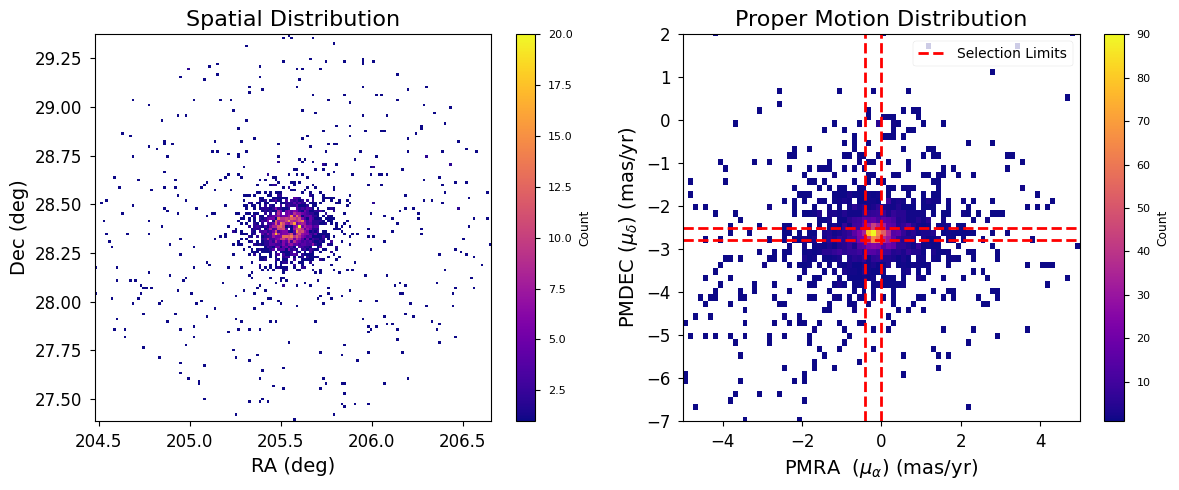

In [395]:
plt.style.use("seaborn-v0_8-paper")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ------------ RA vs Dec ------------
h1 = axes[0].hist2d(M3_data.ra, M3_data.dec, bins=150, cmin=1, cmap="plasma")
fig.colorbar(h1[3], ax=axes[0], label="Count")
axes[0].tick_params(axis='both', labelsize=12)
axes[0].set_xlabel("RA (deg)", fontsize=14)
axes[0].set_ylabel("Dec (deg)", fontsize=14)
axes[0].set_title("Spatial Distribution", fontsize=16)


# ------------ Proper Motion ------------
h2 = axes[1].hist2d(
    M3_data.pmra, M3_data.pmdec, bins=800, cmin=1, range=[[-50, 50], [-60, 60]], cmap="plasma"
)
fig.colorbar(h2[3], ax=axes[1], label="Count")
axes[1].set_xlabel(r"PMRA  ($\mu_{\alpha}$) (mas/yr)", fontsize=14)
axes[1].set_ylabel(r"PMDEC ($\mu_{\delta}$) (mas/yr)", fontsize=14)
axes[1].set_title("Proper Motion Distribution", fontsize=16)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_xlim(-5, 5)
axes[1].set_ylim(-7, 2)
axes[1].axvline(pmra_lim_lo, color="red", linestyle="--", linewidth=2, label="Selection Limits")
axes[1].axvline(pmra_lim_hi, color="red", linestyle="--", linewidth=2)
axes[1].axhline(pmdec_lim_lo, color="red", linestyle="--", linewidth=2)
axes[1].axhline(pmdec_lim_hi, color="red", linestyle="--", linewidth=2)
axes[1].legend(fontsize=10)


plt.tight_layout()
plt.show()

In [396]:
# Applying reddening correction
M3_data_dered = reddening_correction(M3_data)

# Describe both to see differences

M3_data_dered[["phot_bp_mean_mag","dered_BP", "phot_rp_mean_mag", "dered_RP", "phot_g_mean_mag", "dered_G"]].describe()


phot_bp_mean_mag     dered_BP  phot_rp_mean_mag     dered_RP  \
count       2624.000000  2624.000000       2624.000000  2624.000000   
mean          19.509132    19.471291         18.755459    18.733385   
std            1.358621     1.358633          1.384604     1.384588   
min           12.913686    12.880860         11.116984    11.096536   
25%           18.916344    18.879332         18.247458    18.224922   
50%           19.751345    19.713264         19.038967    19.018042   
75%           20.503936    20.465316         19.722173    19.701018   
max           22.133139    22.097580         20.985870    20.965252   

       phot_g_mean_mag      dered_G  
count      2624.000000  2624.000000  
mean         19.302872    19.272211  
std           1.327277     1.327195  
min          12.044281    12.019393  
25%          18.818489    18.786082  
50%          19.590519    19.559662  
75%          20.239874    20.209099  
max          20.930042    20.900698

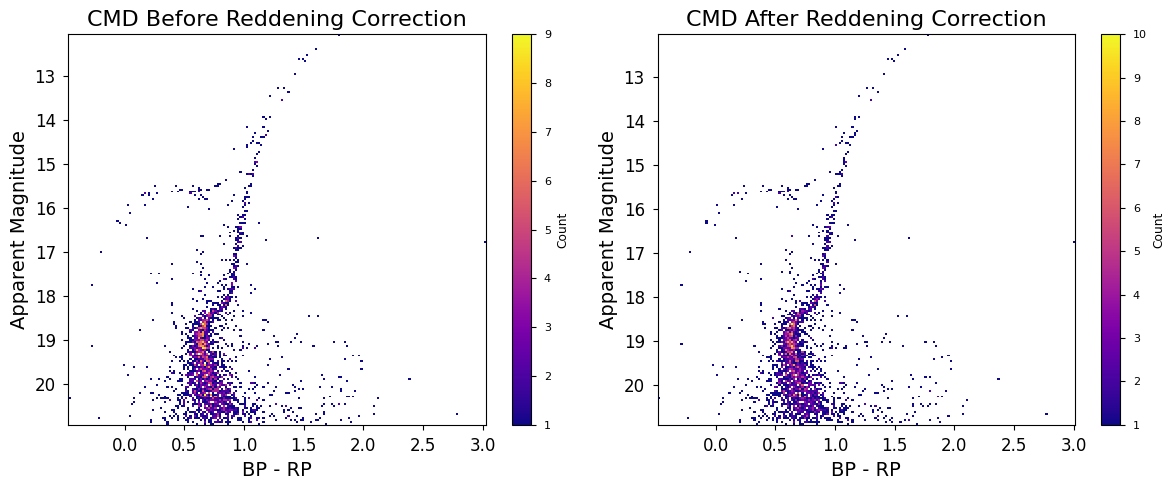

In [397]:
plt.style.use("seaborn-v0_8-paper")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
bp_rp_before = M3_data.phot_bp_mean_mag - M3_data.phot_rp_mean_mag
bp_rp_after = M3_data_dered.dered_BP - M3_data_dered.dered_RP
g_before = M3_data.phot_g_mean_mag
g_after = M3_data_dered.dered_G

# ------------ CMD Before Reddening Correction ------------
h1 = axes[0].hist2d(bp_rp_before, g_before, bins=200, cmin=1, cmap="plasma")
fig.colorbar(h1[3], ax=axes[0], label="Count")
axes[0].tick_params(axis="both", labelsize=12)
axes[0].set_xlabel("BP - RP", fontsize=14)
axes[0].set_ylabel("Apparent Magnitude", fontsize=14)
axes[0].set_title("CMD Before Reddening Correction", fontsize=16)
axes[0].invert_yaxis() 

# ------------ CMD After Reddening Correction ------------
h2 = axes[1].hist2d(bp_rp_after, g_after, bins=200, cmin=1, cmap="plasma")
fig.colorbar(h2[3], ax=axes[1], label="Count")
axes[1].tick_params(axis="both", labelsize=12)
axes[1].set_xlabel("BP - RP", fontsize=14)
axes[1].set_ylabel("Apparent Magnitude", fontsize=14)  # Fixed incorrect label
axes[1].set_title("CMD After Reddening Correction", fontsize=16)
axes[1].invert_yaxis()  

plt.tight_layout()
plt.show()



### Calculate Absolute Magnitude from Bailer Jones Distances

In [398]:
M3_data_dered["abs_G"] = M3_data_dered.dered_G - 5 * np.log10(M3_data_dered.r_med_photogeo) + 5

### Identifying Cluster Stars based on Proper Motions

In [399]:
M3_pm_filtered = M3_data_dered[
    (M3_data_dered.pmra > pmra_lim_lo) & (M3_data_dered.pmra < pmra_lim_hi) &
    (M3_data_dered.pmdec > pmdec_lim_lo) & (M3_data_dered.pmdec < pmdec_lim_hi)
]

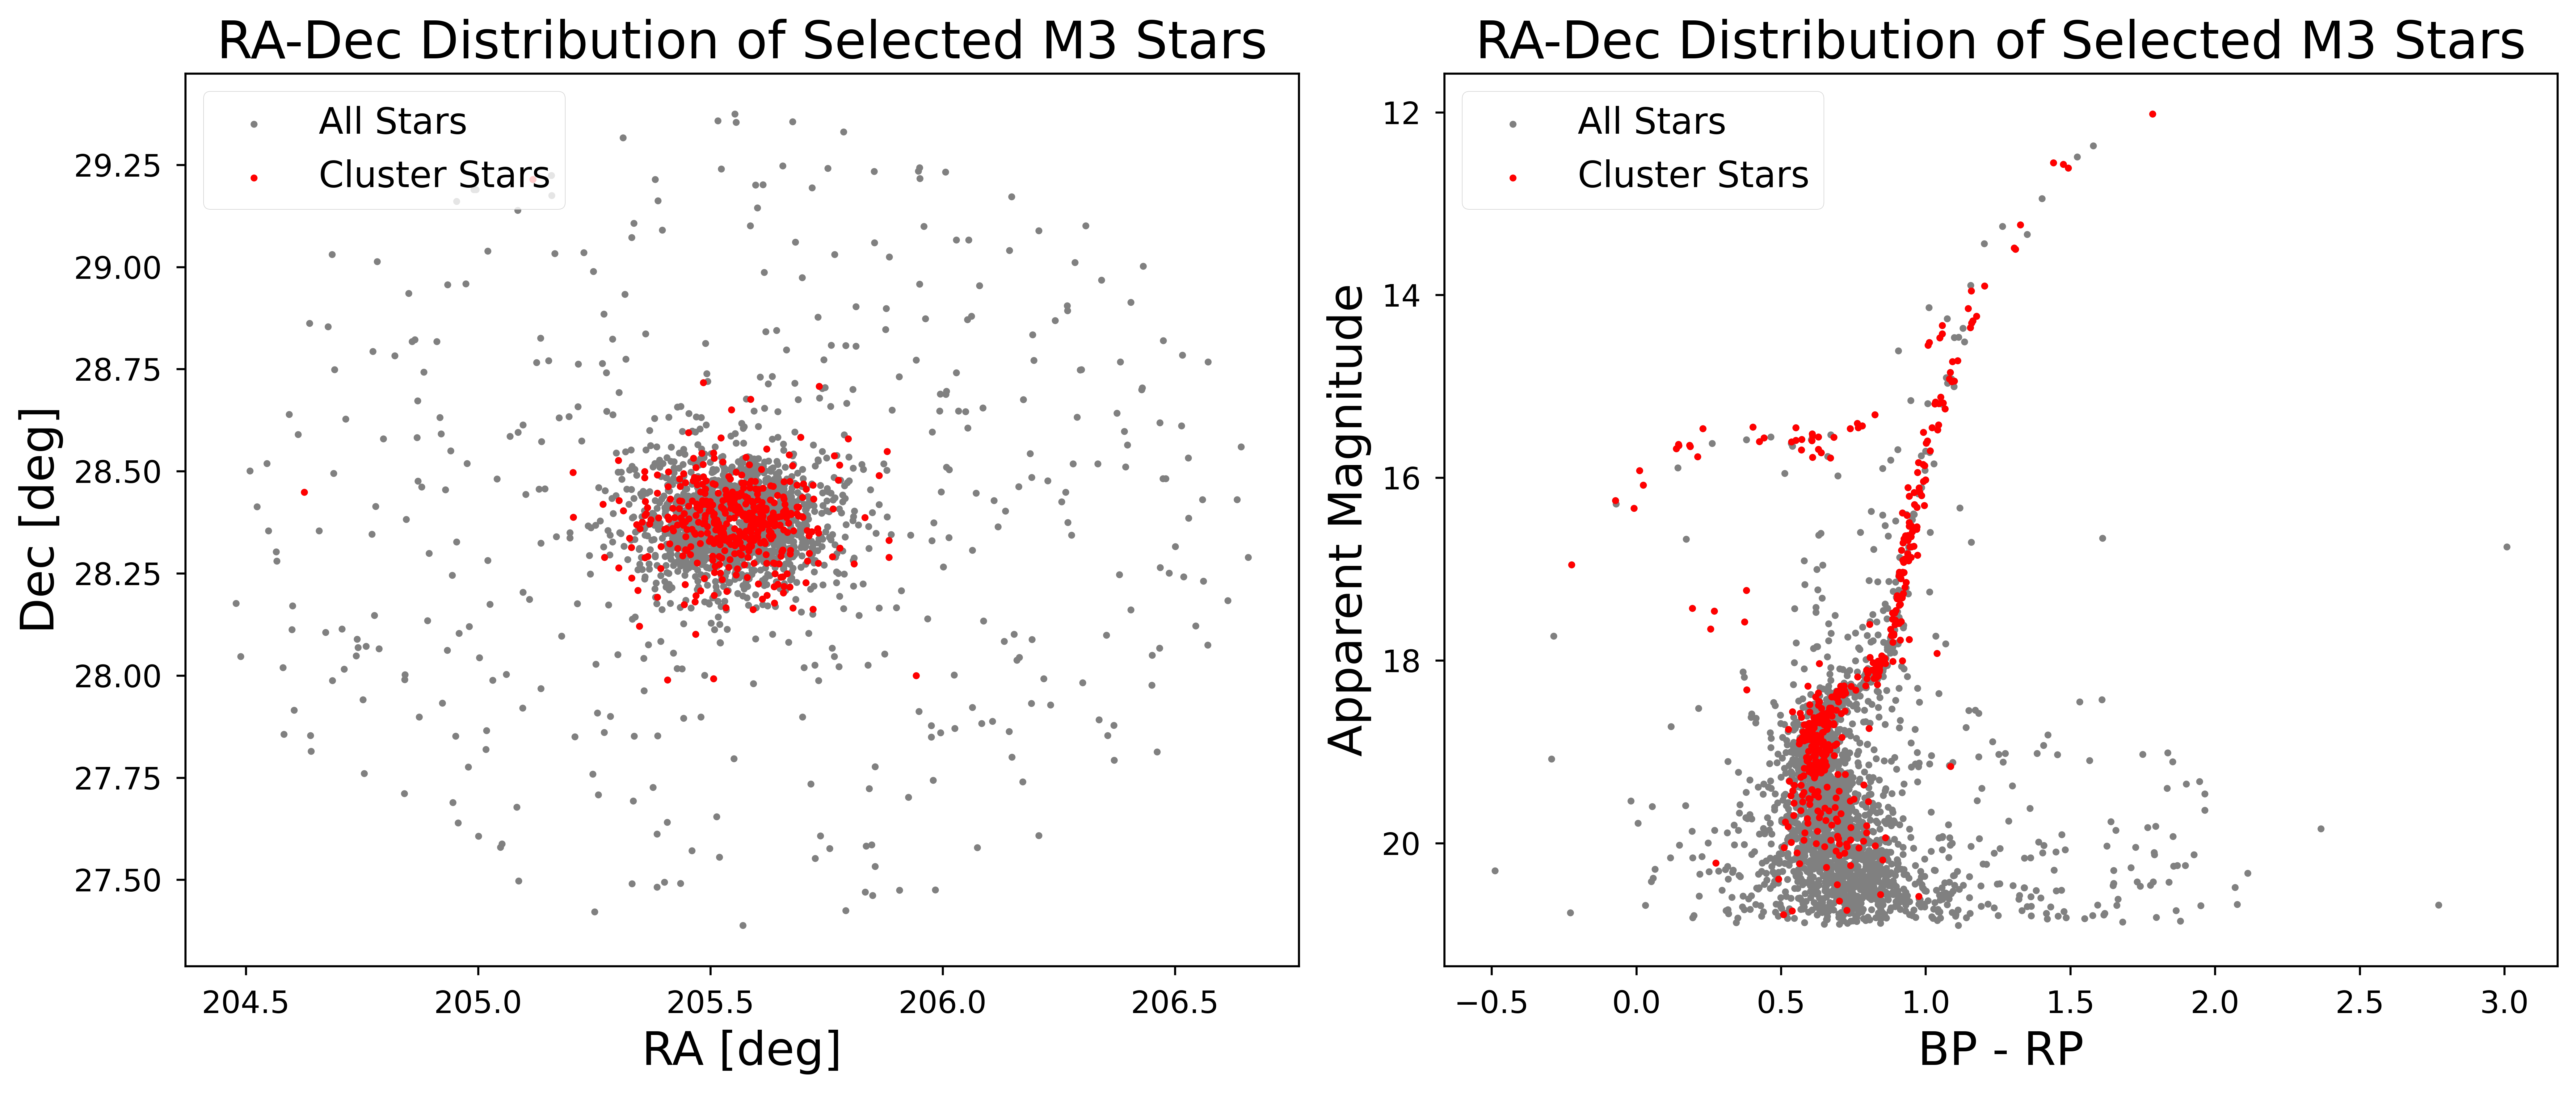

In [400]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    M3_data_dered.ra, M3_data_dered.dec, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.ra, M3_pm_filtered.dec, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"RA [deg]", fontsize=18)
axes[0].set_ylabel(r"Dec [deg]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("RA-Dec Distribution of Selected M3 Stars", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ---------------- Display CMD Cut ----------------

axes[1].scatter(
    bp_rp_after, g_after, c="gray", s=6, alpha=1, label="All Stars"
)
axes[1].scatter(
    M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP, M3_pm_filtered.dered_G, c="red",
    s=6, label="Cluster Stars",
)

axes[1].set_xlabel(r"BP - RP", fontsize=18)
axes[1].set_ylabel(r"Apparent Magnitude", fontsize=18)
axes[1].legend(fontsize=14, loc="upper left")
axes[1].set_title("RA-Dec Distribution of Selected M3 Stars", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()



In [401]:
# ---------------- Print Summary of Indetified Cluster Stars ----------------
summary_data = {
    "Cut Criteria": ["Initial Stars (Gaia Source)", "Cluster Stars from no cut (By PM cut)"],
    "Number of Stars": [len(M3_data_dered),f"{len(M3_pm_filtered)}: ({len(M3_pm_filtered)/len(M3_data_dered)*100:.1f}%)"]
}
summary_df = pd.DataFrame(summary_data)
display(summary_df)

Cut Criteria Number of Stars
0            Initial Stars (Gaia Source)            2624
1  Cluster Stars from no cut (By PM cut)    415: (15.8%)

## Success of Filtering Stars
### Preposed Cuts

| Parameter                | Value |
|--------------------------|-------|
| Proposed BP-RP Lower Cut | 0.5   |
| Proposed BP-RP Upper Cut | 2   |
| Proposed Magnitude Cut   | 19    |
| Proposed Parallax Cut    | -0.3  |
| Proposed Abs Mag Cut     | 5.2 | 


In [402]:
preposed_BP_RP_lo, preposed_BP_RP_hi = 0.5, 2
preposed_mag_cut = 19
preposed_parralax_cut = -0.3
preposed_abs_mag_cut = 5.2

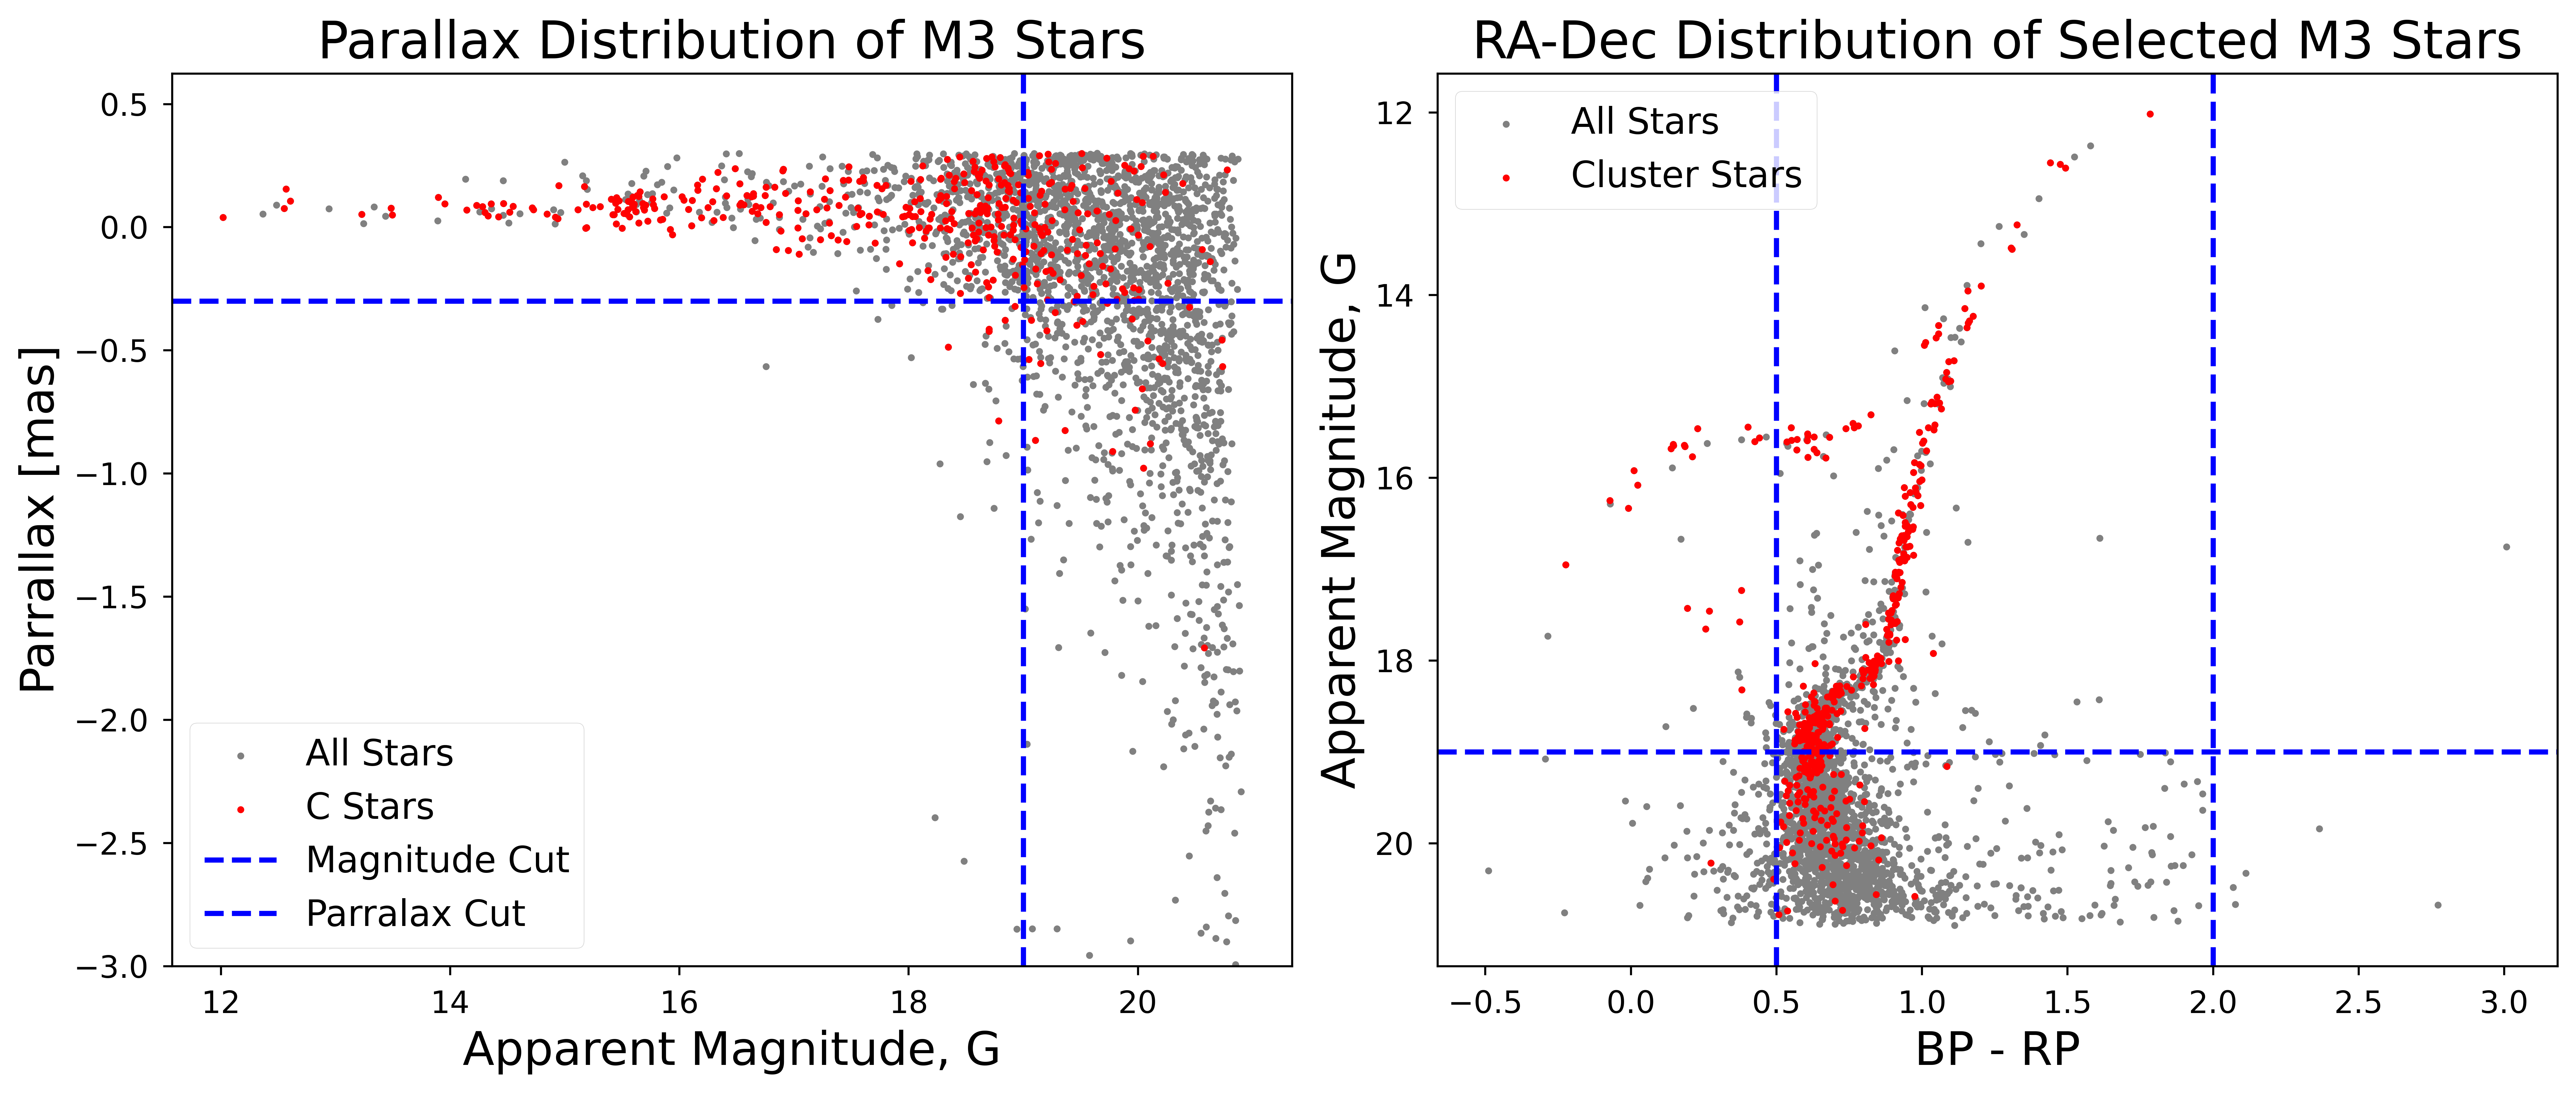

In [403]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

bp_rp_filtered, g_filtered = M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP, M3_pm_filtered.dered_G

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.parallax, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.parallax, c="red", s=6, label="C Stars"
)

axes[0].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")
axes[0].axhline(preposed_parralax_cut, color="blue", linestyle="--", linewidth=2, label="Parralax Cut")
axes[0].set_ylim(-3, None)

axes[0].set_xlabel(r"Apparent Magnitude, G", fontsize=18)
axes[0].set_ylabel(r"Parrallax [mas]", fontsize=18)
axes[0].legend(fontsize=14, loc="lower left")
axes[0].set_title("Parallax Distribution of M3 Stars", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ---------------- Display CMD Cut ----------------

axes[1].scatter(
    bp_rp_after, g_after, c="gray", s=6, alpha=1, label="All Stars"
)
axes[1].scatter(
    bp_rp_filtered, g_filtered, c="red",
    s=6, label="Cluster Stars",
)

axes[1].set_xlabel(r"BP - RP", fontsize=18)
axes[1].set_ylabel(r"Apparent Magnitude, G", fontsize=18)
axes[1].legend(fontsize=14, loc="upper left")
axes[1].set_title("RA-Dec Distribution of Selected M3 Stars", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)
axes[1].invert_yaxis()
axes[1].axvline(preposed_BP_RP_lo, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")
axes[1].axvline(preposed_BP_RP_hi, color="blue", linestyle="--", linewidth=2)
axes[1].axhline(preposed_mag_cut, color="blue", linestyle="--", linewidth=2, label="Magnitude Cut")

plt.tight_layout()
plt.show()

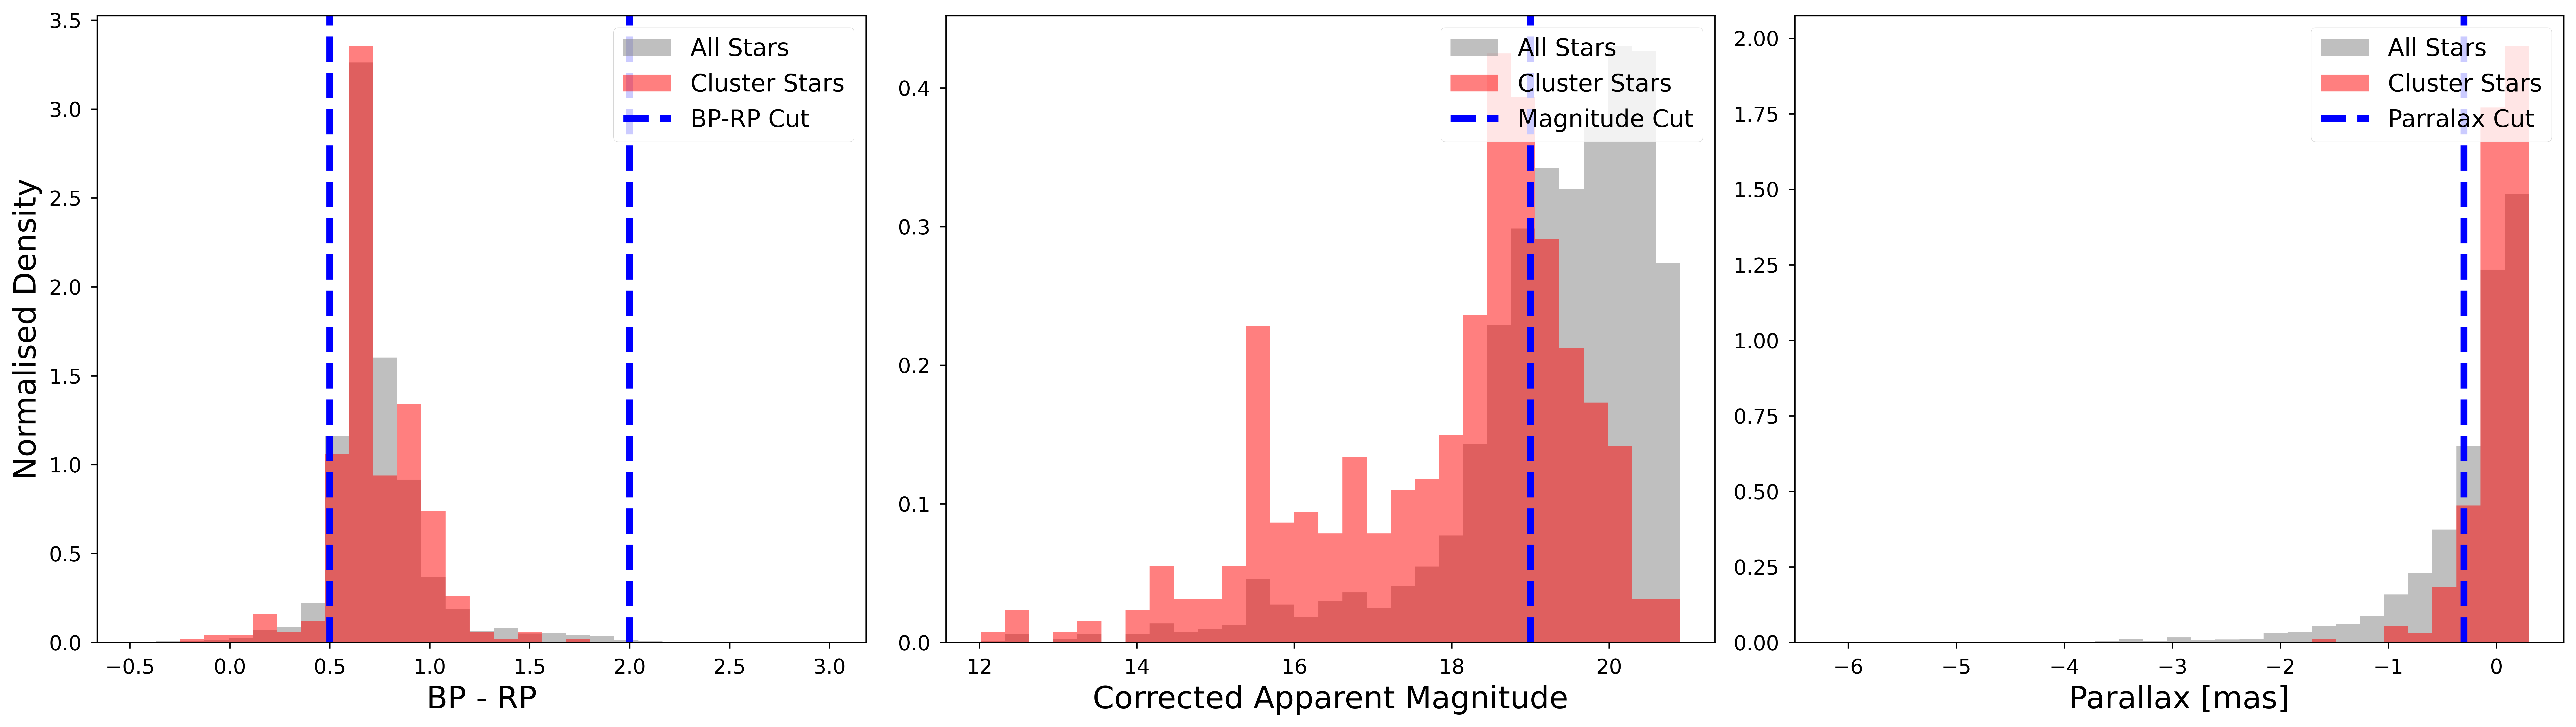

In [404]:
# ---------------- Halo RGB Filter ----------------

fig, axes = plt.subplots(1, 3, figsize=(21, 6), dpi=600)


# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(bp_rp_after.min(), bp_rp_filtered.min()),
                   max(bp_rp_after.max(), bp_rp_filtered.max()), 30)

axes[0].hist(
    bp_rp_after, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[0].hist(
    bp_rp_filtered, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[0].axvline(preposed_BP_RP_lo, color="blue", linestyle="--", linewidth=4, label="BP-RP Cut")
axes[0].axvline(preposed_BP_RP_hi, color="blue", linestyle="--", linewidth=4)
axes[0].set_xlabel("BP - RP", fontsize=18)
axes[0].set_ylabel("Normalised Density", fontsize=18)
axes[0].legend(fontsize=14, loc="upper right")
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(M3_data_dered.dered_G.min(), M3_pm_filtered.dered_G.min()),
                   max(M3_data_dered.dered_G.max(), M3_pm_filtered.dered_G.max()), 30)

axes[1].hist(
    M3_data_dered.dered_G, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.dered_G, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=4, label="Magnitude Cut")

axes[1].set_xlabel("Corrected Apparent Magnitude", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(M3_data_dered.parallax.min(), M3_pm_filtered.parallax.min()),
                   max(M3_data_dered.parallax.max(), M3_pm_filtered.parallax.max()), 30)

axes[2].hist(
    M3_data_dered.parallax, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[2].hist(
    M3_pm_filtered.parallax, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[2].axvline(preposed_parralax_cut, color="blue", linestyle="--", linewidth=4, label="Parralax Cut")
axes[2].set_xlabel("Parallax [mas]", fontsize=18)
axes[2].legend(fontsize=14, loc="upper right")
axes[2].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


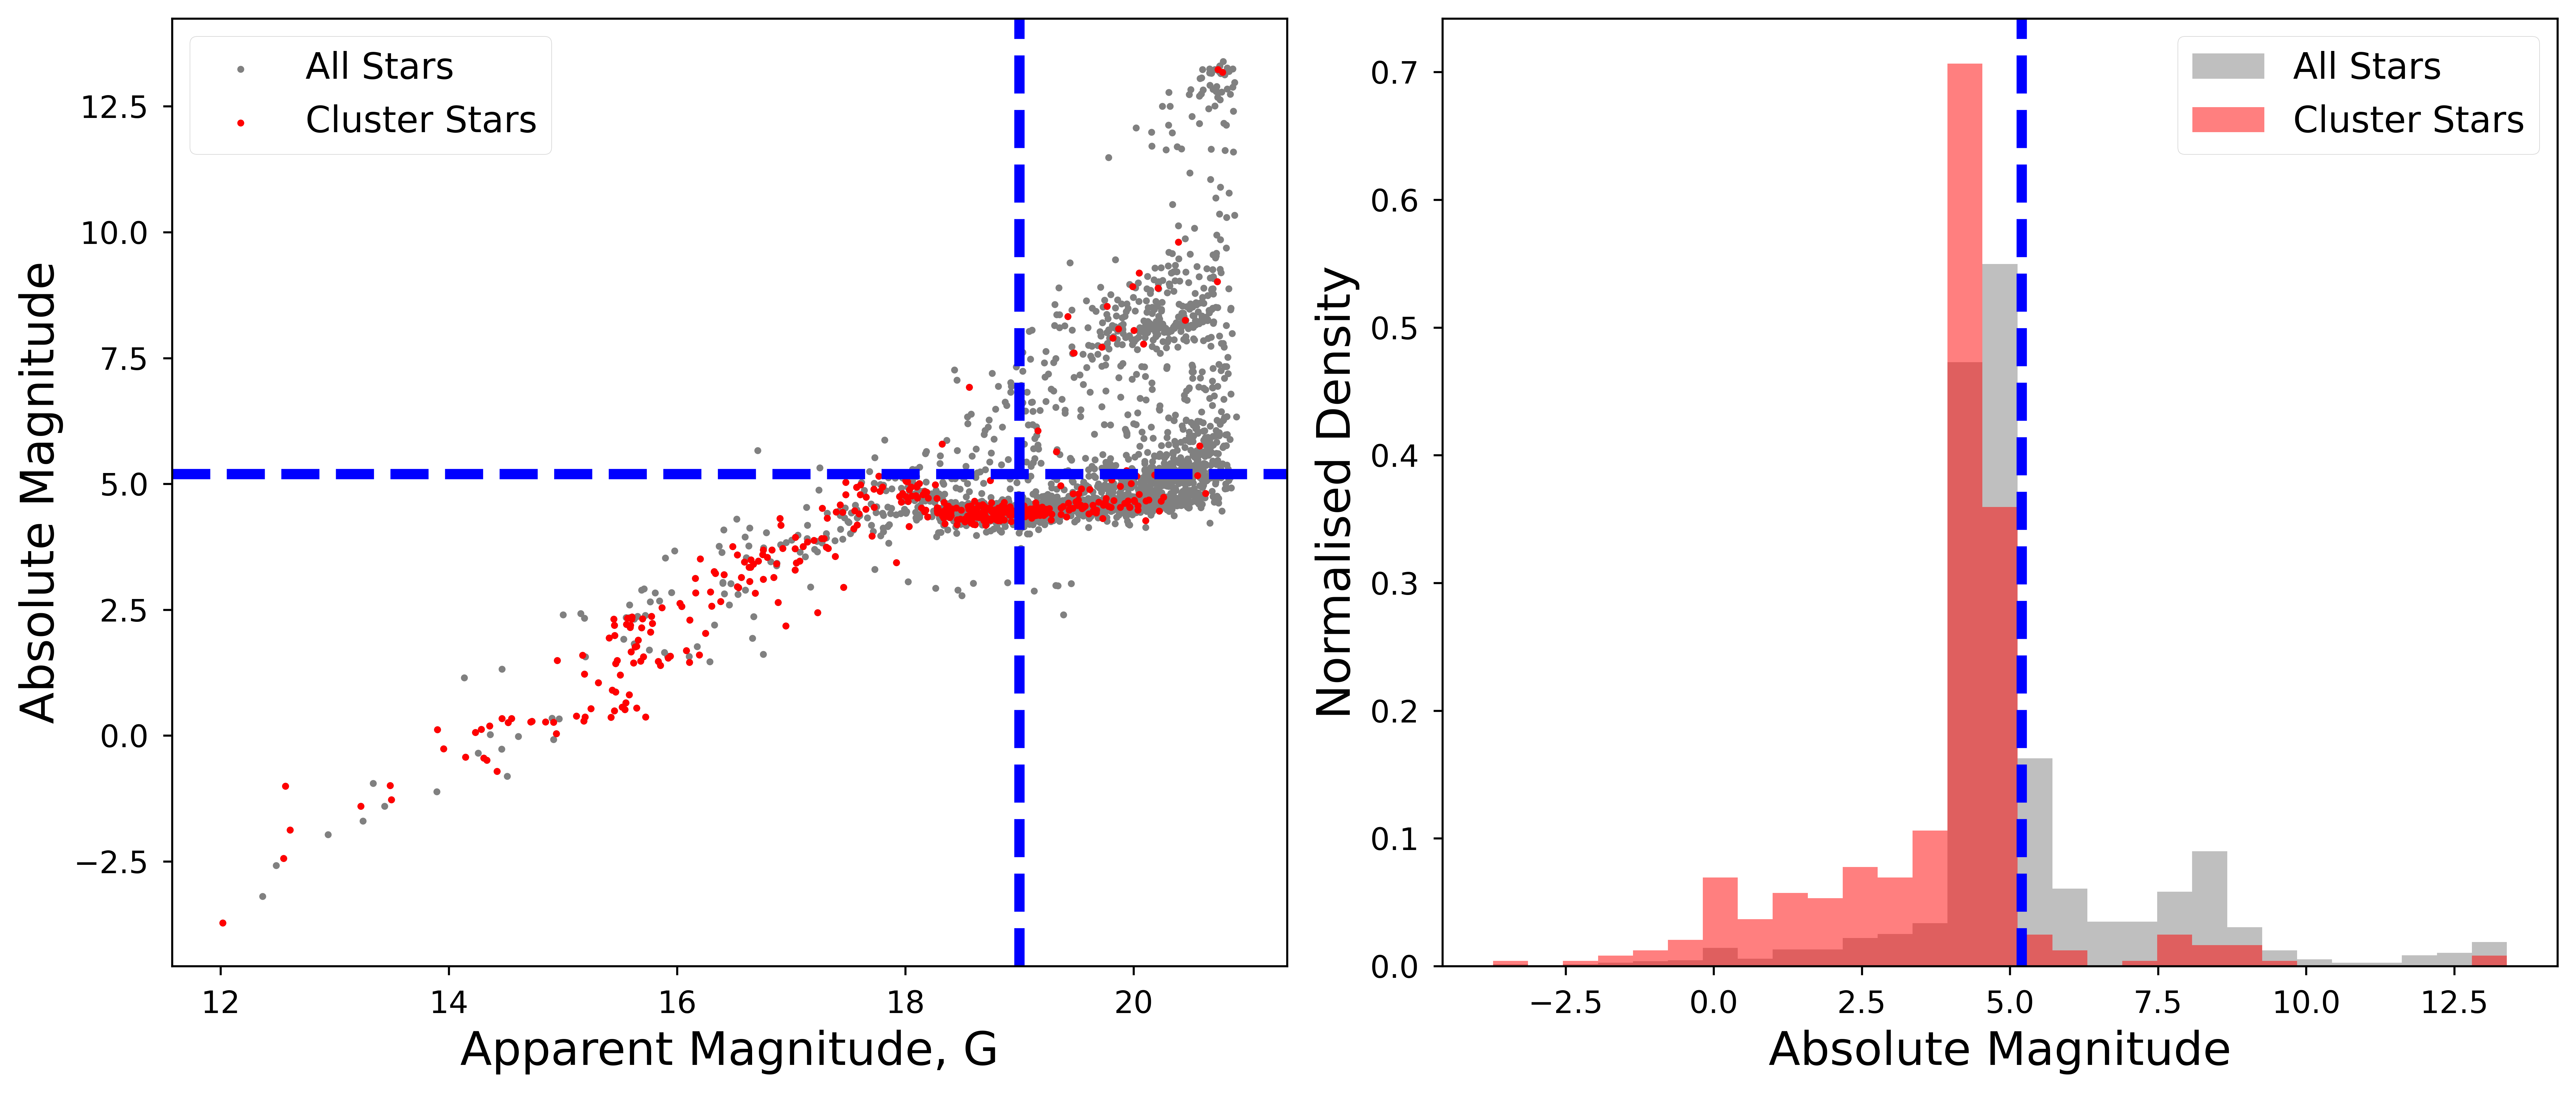

Cut Criteria  Total Number of Stars  No. of Cluster Stars  \
0                  No Cut                   2624                   415   
1      With Magnitude Cut                    811                   294   
2  With Abs Magnitude Cut                   1849                   392   
3               Both Cuts                    764                   292   

  Percentage of Cluster Stars Percentage Improvement From Cut  
0                       15.8%                             N/A  
1                       36.3%                           20.4%  
2                       21.2%                            5.4%  
3                       38.2%                           22.4%

In [405]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: Absolute Magnitude vs Corrected G Magnitude ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.abs_G, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.abs_G, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Apparent Magnitude, G", fontsize=18)
axes[0].set_ylabel(r"Absolute Magnitude", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].tick_params(axis="both", labelsize=12)

axes[0].axvline(preposed_mag_cut, color="blue", linestyle="--", linewidth=4, label="Magnitude Cut")
axes[0].axhline(preposed_abs_mag_cut, color="blue", linestyle="--", linewidth=4, label="Abs Mag Cut")

# ------------ Display Normalised Absolute Magnitude Histogram ------------
bins = np.linspace(min(M3_data_dered.abs_G.min(), M3_pm_filtered.abs_G.min()),
                   max(M3_data_dered.abs_G.max(), M3_pm_filtered.abs_G.max()), 30)

axes[1].hist(
    M3_data_dered.abs_G, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.abs_G, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Absolute Magnitude", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].tick_params(axis="both", labelsize=12)
axes[1].axvline(preposed_abs_mag_cut, color="blue", linestyle="--", linewidth=4, label="Abs Mag Cut")
plt.tight_layout()
plt.show()


# Comparison on filters
# Magnitude Cut
M3_data_dered_mag_cut = M3_data_dered[M3_data_dered.dered_G < preposed_mag_cut]
M3_pm_filtered_mag_cut = M3_pm_filtered[M3_pm_filtered.dered_G < preposed_mag_cut]

# Abs Mag Cut
M3_data_dered_abs_mag_cut = M3_data_dered[M3_data_dered.abs_G < preposed_abs_mag_cut]
M3_pm_filtered_abs_mag_cut = M3_pm_filtered[M3_pm_filtered.abs_G < preposed_abs_mag_cut]

# All Cuts
M3_data_dered_all_cuts_mag = M3_data_dered[
    (M3_data_dered.dered_G < preposed_mag_cut) &
    (M3_data_dered.abs_G < preposed_abs_mag_cut)
]
M3_pm_filtered_all_cuts_mag = M3_pm_filtered[
    (M3_pm_filtered.dered_G < preposed_mag_cut) &
    (M3_pm_filtered.abs_G < preposed_abs_mag_cut)
]

summary_data_mag = {
    "Cut Criteria": ["No Cut", "With Magnitude Cut", "With Abs Magnitude Cut", "Both Cuts"],
    "Total Number of Stars": [
        len(M3_data_dered),
        len(M3_data_dered_mag_cut),
        len(M3_data_dered_abs_mag_cut),
        len(M3_data_dered_all_cuts_mag)
    ],
    "No. of Cluster Stars": [
        len(M3_pm_filtered),
        len(M3_pm_filtered_mag_cut),
        len(M3_pm_filtered_abs_mag_cut),
        len(M3_pm_filtered_all_cuts_mag)
    ],
    "Percentage of Cluster Stars": [
        f"{len(M3_pm_filtered)/len(M3_data_dered)*100:.1f}%",
        f"{len(M3_pm_filtered_mag_cut)/len(M3_data_dered_mag_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_abs_mag_cut)/len(M3_data_dered_abs_mag_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_all_cuts_mag)/len(M3_data_dered_all_cuts_mag)*100:.1f}%"
    ],
    "Percentage Improvement From Cut": [
        "N/A",
        f"{(len(M3_pm_filtered_mag_cut)/len(M3_data_dered_mag_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_abs_mag_cut)/len(M3_data_dered_abs_mag_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_all_cuts_mag)/len(M3_data_dered_all_cuts_mag)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%"
    ]
}
summary_df = pd.DataFrame(summary_data_mag)
display(summary_df)

In [406]:
M3_pm_filtered = M3_data_dered[
    (M3_data_dered.pmra > pmra_lim_lo) & (M3_data_dered.pmra < pmra_lim_hi) &
    (M3_data_dered.pmdec > pmdec_lim_lo) & (M3_data_dered.pmdec < pmdec_lim_hi)
]

In [407]:
# ---------------- Print Summary of Star Numbers after cut ----------------
# Magnitude Cut
M3_data_dered_mag_cut = M3_data_dered[M3_data_dered.dered_G < preposed_mag_cut]
M3_pm_filtered_mag_cut = M3_pm_filtered[M3_pm_filtered.dered_G < preposed_mag_cut]

# Lower BP-RP Cut
M3_data_dered_bp_rp_lo_cut = M3_data_dered[M3_data_dered.dered_BP - M3_data_dered.dered_RP > preposed_BP_RP_lo]
M3_pm_filtered_bp_rp_lo_cut = M3_pm_filtered[M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP > preposed_BP_RP_lo]

# Upper BP-RP Cut
M3_data_dered_bp_rp_hi_cut = M3_data_dered[M3_data_dered.dered_BP - M3_data_dered.dered_RP < preposed_BP_RP_hi]
M3_pm_filtered_bp_rp_hi_cut = M3_pm_filtered[M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP < preposed_BP_RP_hi]

# Parallax Cut
M3_data_dered_parallax_cut = M3_data_dered[M3_data_dered.parallax > preposed_parralax_cut]
M3_pm_filtered_parallax_cut = M3_pm_filtered[M3_pm_filtered.parallax > preposed_parralax_cut]

# Abs Mag Cut
M3_data_dered_abs_mag_cut = M3_data_dered[M3_data_dered.abs_G < preposed_abs_mag_cut]
M3_pm_filtered_abs_mag_cut = M3_pm_filtered[M3_pm_filtered.abs_G < preposed_abs_mag_cut]

# All Cuts
M3_data_dered_all_cuts = M3_data_dered[
    (M3_data_dered.dered_G < preposed_mag_cut) &
    (M3_data_dered.dered_BP - M3_data_dered.dered_RP > preposed_BP_RP_lo) &
    (M3_data_dered.dered_BP - M3_data_dered.dered_RP < preposed_BP_RP_hi) &
    (M3_data_dered.parallax > preposed_parralax_cut) &
    (M3_data_dered.abs_G < preposed_abs_mag_cut)
]
M3_pm_filtered_all_cuts = M3_pm_filtered[
    (M3_pm_filtered.dered_G < preposed_mag_cut) &
    (M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP > preposed_BP_RP_lo) &
    (M3_pm_filtered.dered_BP - M3_pm_filtered.dered_RP < preposed_BP_RP_hi) &
    (M3_pm_filtered.parallax > preposed_parralax_cut) &
    (M3_pm_filtered.abs_G < preposed_abs_mag_cut)
]

summary_data = {
    "Cut Criteria": ["No Cut", "With Magnitude Cut", "With Abs Mag Cut", "With BP-RP Lower Cut", "With BP-RP Upper Cut", "With Parallax Cut", "All Cuts"],
    "Total Number of Stars": [
        len(M3_data_dered),
        len(M3_data_dered_mag_cut),
        len(M3_data_dered_abs_mag_cut),
        len(M3_data_dered_bp_rp_lo_cut),
        len(M3_data_dered_bp_rp_hi_cut),
        len(M3_data_dered_parallax_cut),
        len(M3_data_dered_all_cuts)
    ],
    "No. of Cluster Stars": [
        len(M3_pm_filtered),
        len(M3_pm_filtered_mag_cut),
        len(M3_pm_filtered_abs_mag_cut),
        len(M3_pm_filtered_bp_rp_lo_cut),
        len(M3_pm_filtered_bp_rp_hi_cut),
        len(M3_pm_filtered_parallax_cut),
        len(M3_pm_filtered_all_cuts)
    ],
    "Percentage of Cluster Stars": [
        f"{len(M3_pm_filtered)/len(M3_data_dered)*100:.1f}%",
        f"{len(M3_pm_filtered_mag_cut)/len(M3_data_dered_mag_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_abs_mag_cut)/len(M3_data_dered_abs_mag_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_bp_rp_lo_cut)/len(M3_data_dered_bp_rp_lo_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_bp_rp_hi_cut)/len(M3_data_dered_bp_rp_hi_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_parallax_cut)/len(M3_data_dered_parallax_cut)*100:.1f}%",
        f"{len(M3_pm_filtered_all_cuts)/len(M3_data_dered_all_cuts)*100:.1f}%"
    ],
    "Percentage Improvement From Cut": [
        "N/A",
        f"{(len(M3_pm_filtered_mag_cut)/len(M3_data_dered_mag_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_abs_mag_cut)/len(M3_data_dered_abs_mag_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_bp_rp_lo_cut)/len(M3_data_dered_bp_rp_lo_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_bp_rp_hi_cut)/len(M3_data_dered_bp_rp_hi_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_parallax_cut)/len(M3_data_dered_parallax_cut)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%",
        f"{(len(M3_pm_filtered_all_cuts)/len(M3_data_dered_all_cuts)*100 - len(M3_pm_filtered)/len(M3_data_dered)*100):.1f}%"
    ]
}

summary_df = pd.DataFrame(summary_data)
display(summary_df)

Cut Criteria  Total Number of Stars  No. of Cluster Stars  \
0                No Cut                   2624                   415   
1    With Magnitude Cut                    811                   294   
2      With Abs Mag Cut                   1849                   392   
3  With BP-RP Lower Cut                   2461                   392   
4  With BP-RP Upper Cut                   2618                   415   
5     With Parallax Cut                   1882                   384   
6              All Cuts                    695                   266   

  Percentage of Cluster Stars Percentage Improvement From Cut  
0                       15.8%                             N/A  
1                       36.3%                           20.4%  
2                       21.2%                            5.4%  
3                       15.9%                            0.1%  
4                       15.9%                            0.0%  
5                       20.4%                            4.6%  
6                       38.3%                           22.5%

### Investigating Validity of other potential Cuts (Surface Temp and Log G from Gaia)
- These are found not to be viable due to the inaccuracy of this data from gaia

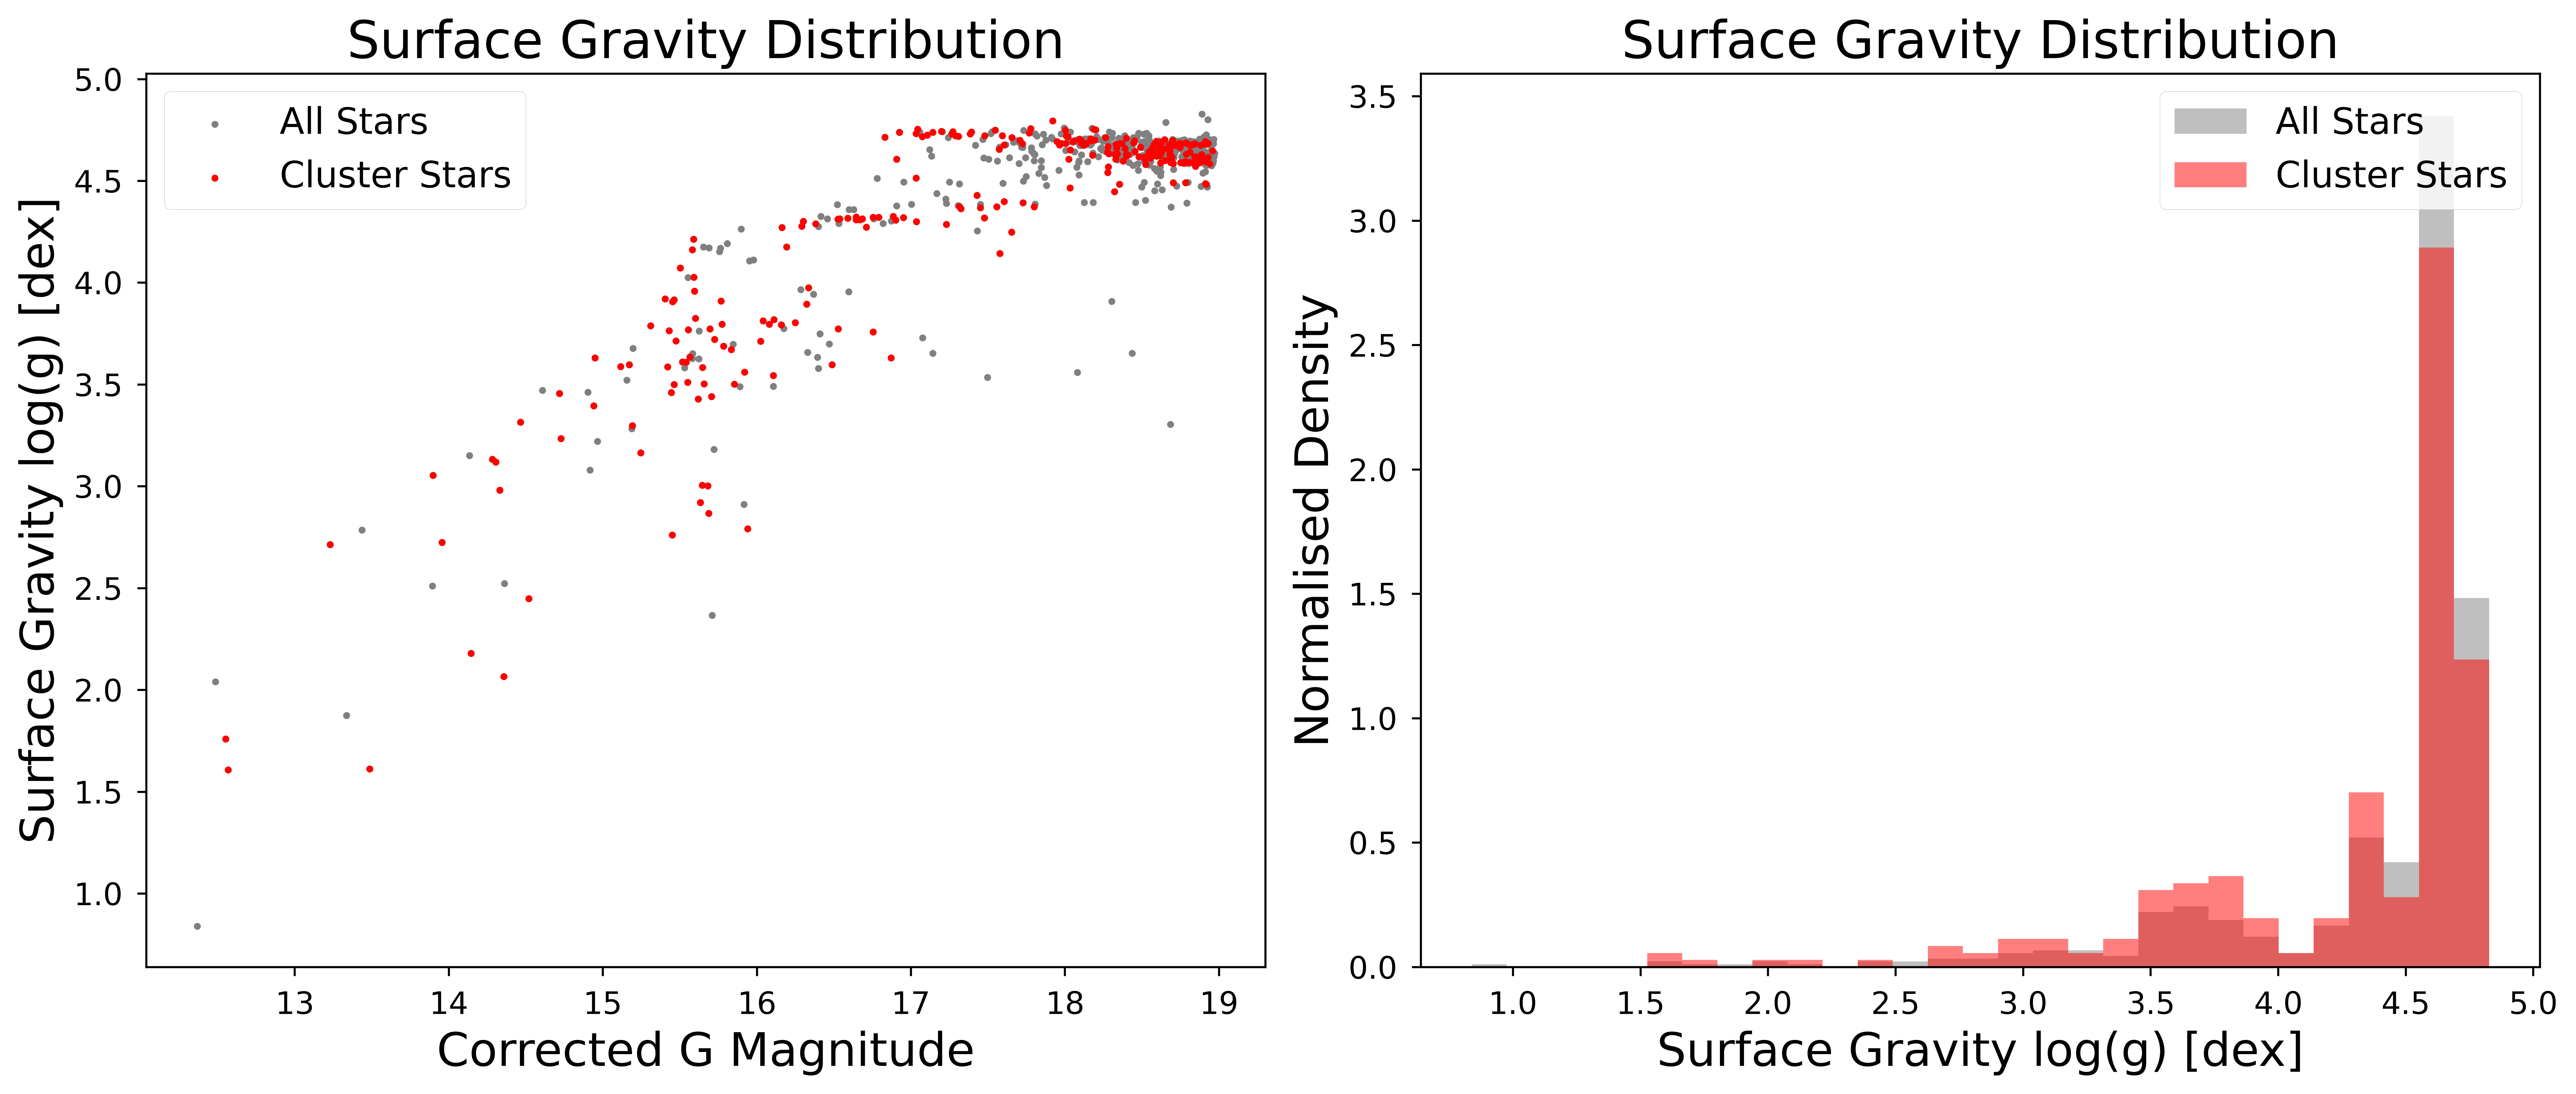

In [408]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: logg_gspphot vs Corrected G Magnitude ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.logg_gspphot, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.logg_gspphot, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Surface Gravity log(g) [dex]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Surface Gravity Distribution", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized logg_gspphot Histogram ------------
bins = np.linspace(min(M3_data_dered.logg_gspphot.min(), M3_pm_filtered.logg_gspphot.min()),
                   max(M3_data_dered.logg_gspphot.max(), M3_pm_filtered.logg_gspphot.max()), 30)

axes[1].hist(
    M3_data_dered.logg_gspphot, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.logg_gspphot, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Surface Gravity log(g) [dex]", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Surface Gravity Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

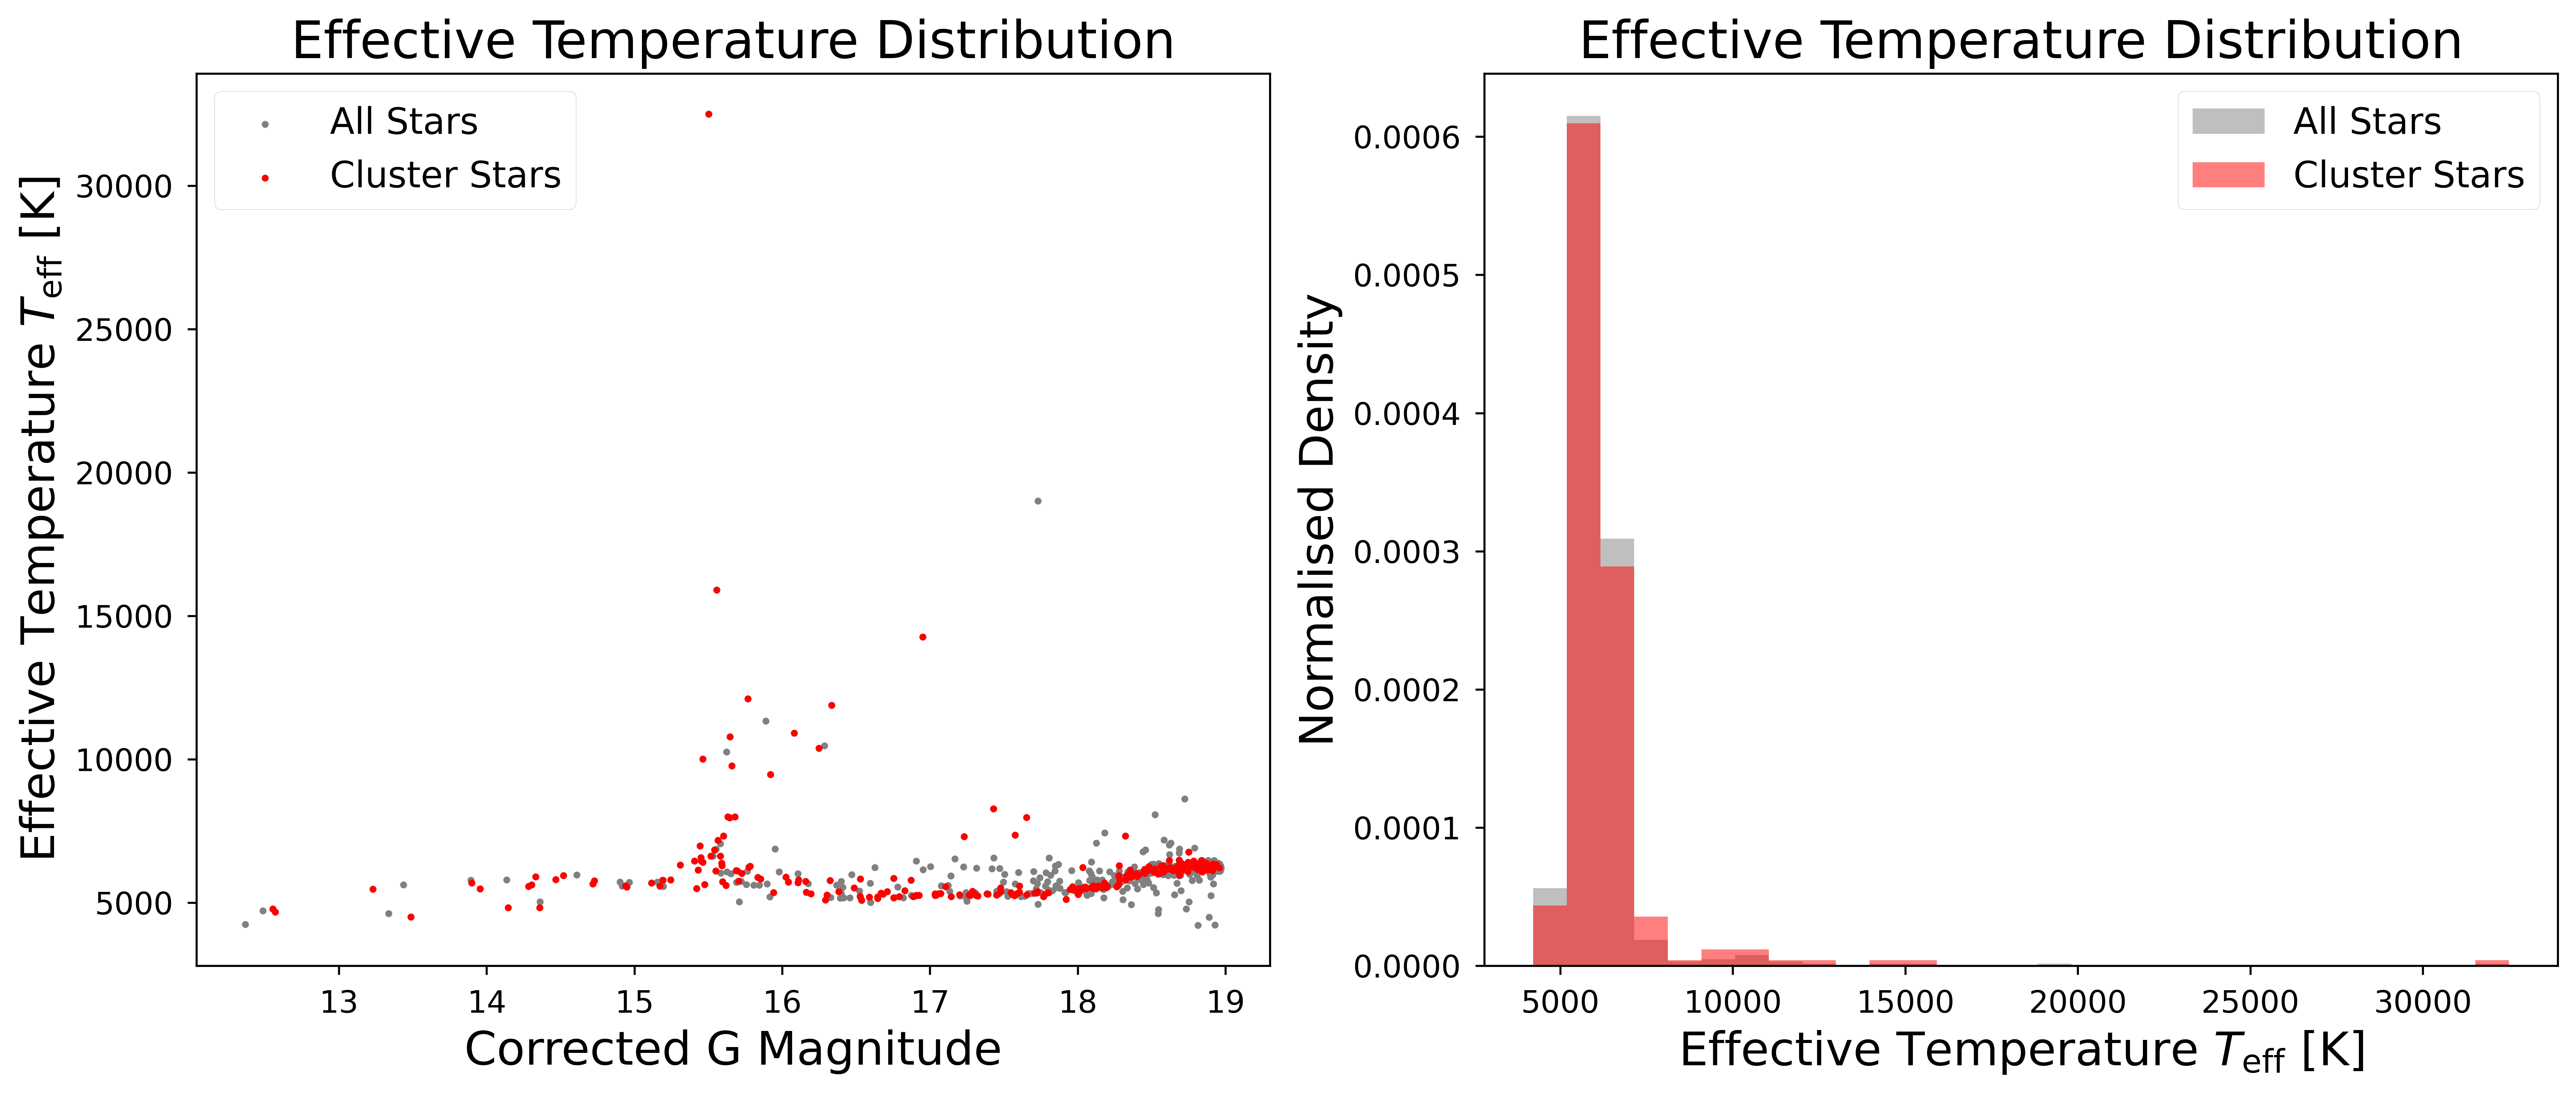

In [409]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display Scatter Plot: teff_gspphot vs Corrected G Magnitude ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.teff_gspphot, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.teff_gspphot, c="red", s=6, label="Cluster Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Effective Temperature $T_{\mathrm{eff}}$ [K]", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Effective Temperature Distribution", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized teff_gspphot Histogram ------------
bins = np.linspace(min(M3_data_dered.teff_gspphot.min(), M3_pm_filtered.teff_gspphot.min()),
                   max(M3_data_dered.teff_gspphot.max(), M3_pm_filtered.teff_gspphot.max()), 30)

axes[1].hist(
    M3_data_dered.teff_gspphot, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.teff_gspphot, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel(r"Effective Temperature $T_{\mathrm{eff}}$ [K]", fontsize=18)
axes[1].set_ylabel("Normalised Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Effective Temperature Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()

### Investigating the Bailer Jones Distances

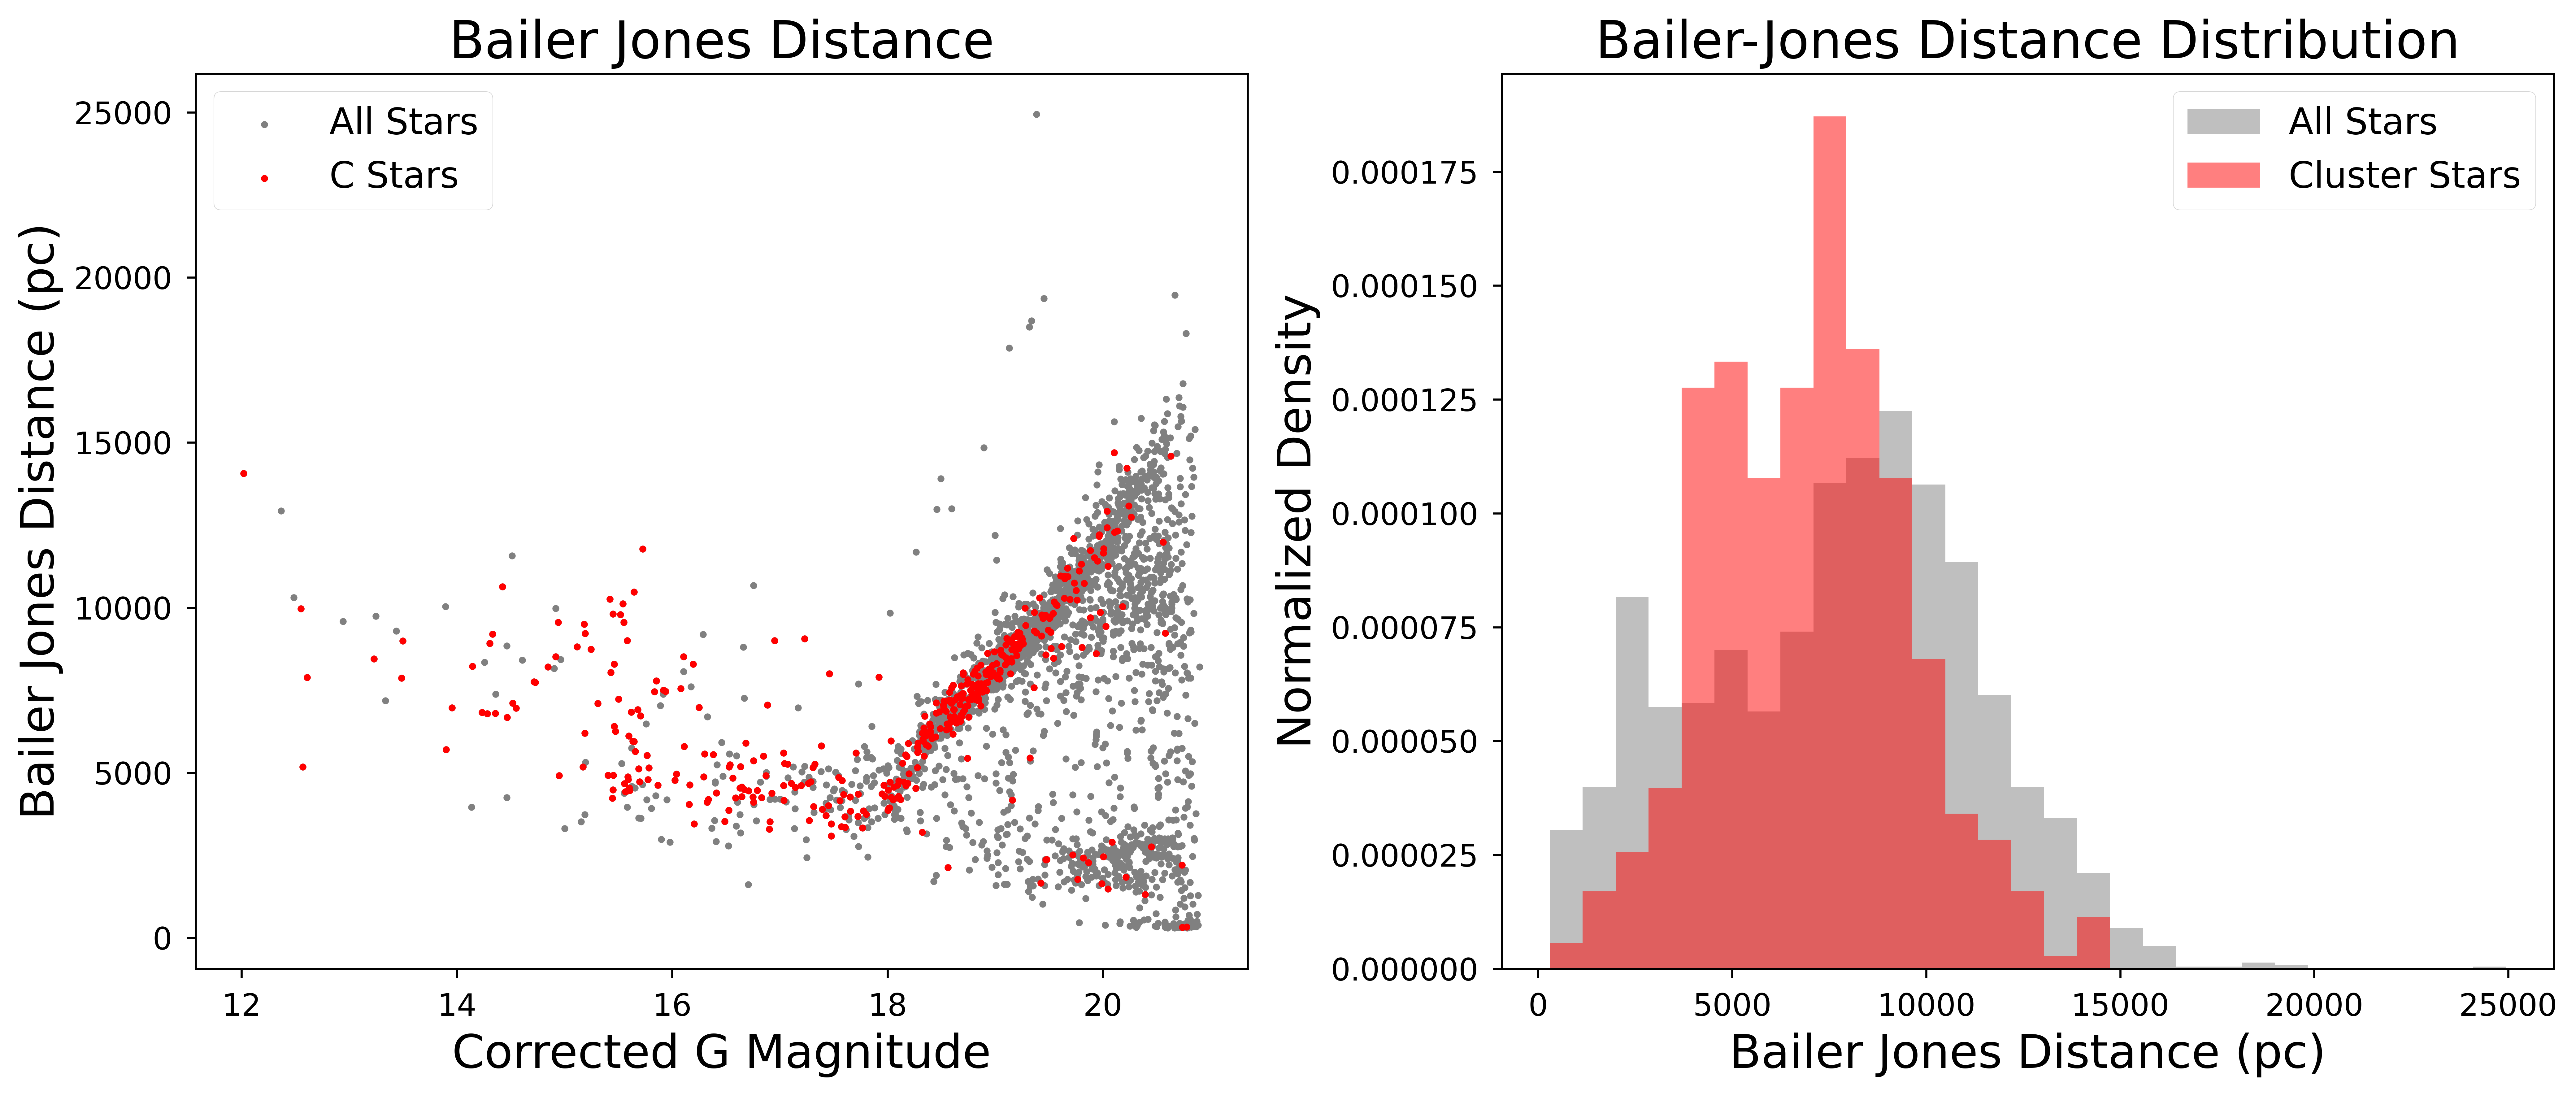

In [410]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=600)

# ------------ Display RA-Dec Cut ------------
axes[0].scatter(
    M3_data_dered.dered_G, M3_data_dered.r_med_photogeo, c="gray", s=6, alpha=1, label="All Stars"
)
axes[0].scatter(
    M3_pm_filtered.dered_G, M3_pm_filtered.r_med_photogeo, c="red", s=6, label="C Stars"
)

axes[0].set_xlabel(r"Corrected G Magnitude", fontsize=18)
axes[0].set_ylabel(r"Bailer Jones Distance (pc)", fontsize=18)
axes[0].legend(fontsize=14, loc="upper left")
axes[0].set_title("Bailer Jones Distance", fontsize=20)
axes[0].tick_params(axis="both", labelsize=12)

# ------------ Display Normalized Parallax Histogram ------------
bins = np.linspace(min(M3_data_dered.r_med_photogeo.min(), M3_pm_filtered.r_med_photogeo.min()),
                   max(M3_data_dered.r_med_photogeo.max(), M3_pm_filtered.r_med_photogeo.max()), 30)

axes[1].hist(
    M3_data_dered.r_med_photogeo, bins=bins, density=True, alpha=0.5, color="gray", label="All Stars"
)
axes[1].hist(
    M3_pm_filtered.r_med_photogeo, bins=bins, density=True, alpha=0.5, color="red", label="Cluster Stars"
)

axes[1].set_xlabel("Bailer Jones Distance (pc)", fontsize=18)
axes[1].set_ylabel("Normalized Density", fontsize=18)
axes[1].legend(fontsize=14, loc="upper right")
axes[1].set_title("Bailer-Jones Distance Distribution", fontsize=20)
axes[1].tick_params(axis="both", labelsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()
